# Downloading the data
From the url `https://crcns.org/data-sets/vc/pvc-11/about` download the file `data_and_scripts.tar.gz` and extract the files `natural_movie_one.mat` and `data_monkey1_natural_movie.mat`, and store them into the folder `pub-bellec-wang-2021-sample-and-measure/data/v1_natural`.

## Movie data
We have to resize the movie into a resolution $27 \times 27$

In [2]:
import mat73
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from skimage.transform import resize

%matplotlib inline

In [3]:
movie_data_raw = scipy.io.loadmat("data/v1_natural/natural_movie.mat")
movie_data_raw = movie_data_raw['M']

In [4]:
def downsample(movie):
    n_frames = movie.shape[2]
    movie_resized = [resize(movie[:,:,i], (27,27)) for i in range(n_frames)]
    return np.stack(movie_resized, 2)

movie_data = downsample(movie_data_raw)

In [5]:
movie_data.shape

(27, 27, 750)

Save the data into a numpy file format

In [6]:
np.save("data/v1_natural/M_train(last)_natural.npy", movie_data)

Just show some frames of the movie to know what we are dealing with

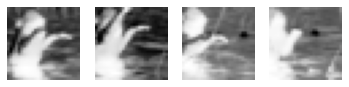

In [7]:
fig, ax_list = plt.subplots(1,4)
for i in range(len(ax_list)):
    ax_list[i].imshow(movie_data[:,:,i*10], aspect=1.0, cmap="Greys")
    ax_list[i].axis('off')

# Spike train data

We have bin the spikes which are given as lists of event times.

In [8]:
spike_data = mat73.loadmat("data/v1_natural/data_monkey1_natural_movie.mat")
spike_data = spike_data['data']['EVENTS']

In [9]:
num_units = len(spike_data)
num_stim = len(spike_data[0])
num_trials = len(spike_data[0][1])

(num_units, num_stim, num_trials)

(74, 120, 10)

In [10]:
def bin_spike_train(spike_data, dt, duration):
    num_units = len(spike_data)
    num_stim = len(spike_data[0])

    T = int(duration / dt)
    data = np.zeros([num_stim, T, num_units], dtype=bool)
    for i_unit in range(num_units):
        for i_stim in range(num_stim):
            spike_times = spike_data[i_unit][i_stim].flatten()

            if spike_times.size > 0:
                for i_spike in range(spike_times.size):
                    t_spike = spike_times[i_spike]
                    t_index = int(t_spike / dt)
                    if t_index > T-1:
                        print(f"Warning: spike ignored at {i_unit}, {i_stim} for time: {t_spike}s but array stops at {duration}s")
                    else:
                        data[i_stim, t_index, i_unit] = True
    return data

spike_train = bin_spike_train(spike_data, 0.04, 30)
spike_train.shape

(120, 750, 74)

Now we save the array, for historical reason we save it as a 2D-array

In [11]:
np.save("data/v1_natural/S_1_train(last)_natural_first80.npy", spike_train[:80].reshape(-1, spike_train.shape[2]))
np.save("data/v1_natural/S_1_train(last)_natural_mid30.npy", spike_train[-40:-10].reshape(-1, spike_train.shape[2]))
np.save("data/v1_natural/S_1_train(last)_natural_last10.npy", spike_train[-10:].reshape(-1, spike_train.shape[2]))